In [28]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load combined data
with open('combined_data.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract dataframes
dengue_cluster = data['dengue_cluster']
address_mapping = data['address_postal_code_mapping']
land_use = data['land_use_data']
landuse_station = data['landuse_station_mapping']
postal_landuse_mapping = data['postal_landuse_mapping']
humidity_scores = data['station_humidity_scores']
rainfall_scores = data['station_rainfall_scores']
landuse_station_mapping = data['landuse_station_mapping'] 

## 1. Dengue Cluster Data (dengue_cluster)
- Number Of Cases: Number of reported dengue cases at this location
- Street Address: Street address where dengue cases are reported
- Latitude: Latitude of the street address
- Longitude: Longitude of the street address
- Cluster Number: Serial number of the dengue cluster
- Recent Cases In Cluster: Number of cases with onset in last 2 weeks
- Total Cases In Cluster: Total number of cases in this cluster
- Date: Date of the report (datetime format)
- Month Number: Month index (1-12)
- postal_code: Nearest postal code to the address

In [31]:
print("Dengue Cluster Data - First 5 rows:")
print(dengue_cluster.head())

Dengue Cluster Data - First 5 rows:
   Number Of Cases                Street Address  Latitude   Longitude  \
0                4  bishan street 22 (block 232)  1.358286  103.845226   
1                7  bishan street 22 (block 233)  1.358639  103.845259   
2                3  bishan street 22 (block 234)  1.358390  103.845955   
3                1  bishan street 22 (block 235)  1.358719  103.846477   
4                4  bishan street 22 (block 236)  1.359041  103.846849   

   Cluster Number  Recent Cases In Cluster  Total Cases In Cluster       Date  \
0               1                       24                      83 2015-07-03   
1               1                       24                      83 2015-07-03   
2               1                       24                      83 2015-07-03   
3               1                       24                      83 2015-07-03   
4               1                       24                      83 2015-07-03   

   Month Number  postal_code  
0

## 2. Address Postal Code Mapping (address_mapping)
- Street Address: Street address from dengue data
- Address Latitude: Latitude of the address
- Address Longitude: Longitude of the address
- postal_code: Nearest postal code
- postal_street_name: Street name from postal data
- postal_lat: Latitude of postal code location
- postal_lon: Longitude of postal code location
- distance_meters: Distance between address and postal code
  

In [34]:
print("Address Postal Code Mapping - First 5 rows:")
print(address_mapping.head())

Address Postal Code Mapping - First 5 rows:
                 Street Address  Address Latitude  Address Longitude  \
0  bishan street 22 (block 232)          1.358286         103.845226   
1  bishan street 22 (block 233)          1.358639         103.845259   
2  bishan street 22 (block 234)          1.358390         103.845955   
3  bishan street 22 (block 235)          1.358719         103.846477   
4  bishan street 22 (block 236)          1.359041         103.846849   

   postal_code postal_street_name  postal_lat  postal_lon  distance_meters  
0       570232   Bishan Street 22      1.3582    103.8456        42.660816  
1       570233   Bishan Street 22      1.3586    103.8456        38.165106  
2       570234   Bishan Street 22      1.3583    103.8462        29.015542  
3       570235   Bishan Street 22      1.3585    103.8465        24.486706  
4       570236   Bishan Street 22      1.3590    103.8470        17.393806  


## 3. Land Use Data (land_use)
- name: Name of the land use area
- lu_desc: Land use description
- lu_text: Detailed land use text
- gpr: Gross Plot Ratio
- whi_q_mx: Maximum White Index
- gpr_b_mn: Minimum Building Plot Ratio
- inc_crc: Increment Circle
- fmel_upd_d: Update date
- area_sqm: Area in square meters
- center_lon: Longitude of center point
- center_lat: Latitude of center point
- coordinates: Polygon coordinates

In [37]:
print("Land Use Data - First 5 rows:")
print(land_use.head(100))

Land Use Data - First 5 rows:
       name           lu_desc lu_text  gpr whi_q_mx gpr_b_mn  \
0     kml_1        OPEN SPACE          EVA                     
1     kml_2              ROAD           NA                     
2     kml_3  PLACE OF WORSHIP       W  EVA                     
3     kml_4              ROAD           NA                     
4     kml_5        COMMERCIAL          EVA                     
..      ...               ...     ...  ...      ...      ...   
95   kml_96        BUSINESS 2          1.4                     
96   kml_97        BUSINESS 2          1.4                     
97   kml_98        BUSINESS 2          1.4                     
98   kml_99        BUSINESS 2          1.4                     
99  kml_100        BUSINESS 2          1.4                     

             inc_crc      fmel_upd_d       area_sqm  center_lon  center_lat  \
0   2481817E4931D054  20191209171707  151219.442104  103.816937    1.341371   
1   C56C3E0EA19D36D8  20191209171707    116

## 4. Land Use Station Mapping (landuse_station)
- landuse_name: Name of land use area
- landuse_lat: Latitude of land use area
- landuse_lon: Longitude of land use area
- landuse_type: Type of land use
- station_id: ID of nearest weather station
- station_name: Name of weather station
- total_rainfall: Total rainfall at station
- overall_rain_score: Overall rainfall score
- station_lat: Latitude of station
- station_lon: Longitude of station
- distance_km: Distance to station in kilometers

In [40]:
print("Land Use Station Mapping - First 5 rows:")
print(landuse_station.head())

Land Use Station Mapping - First 5 rows:
  landuse_name  landuse_lat  landuse_lon      landuse_type station_id  \
0        kml_1     1.341371   103.816937        OPEN SPACE        S46   
1        kml_2     1.341741   103.834931              ROAD        S07   
2        kml_3     1.376230   103.734428  PLACE OF WORSHIP       S114   
3        kml_4     1.404280   103.866961              ROAD       S900   
4        kml_5     1.408583   103.867176        COMMERCIAL       S900   

             station_name  total_rainfall  overall_rain_score  station_lat  \
0               Sime Road        6.038047            0.657153      1.34160   
1             Lornie Road        6.337888            0.689786      1.34150   
2  Choa Chu Kang Avenue 4        6.791341            0.739138      1.38000   
3  Seletar Aerospace View        6.545734            0.712407      1.41284   
4  Seletar Aerospace View        6.545734            0.712407      1.41284   

   station_lon  distance_km  
0    103.81060     0.

## 5. Station Humidity Scores (humidity_scores)
- station_id: ID of weather station
- station_name: Name of weather station
- aggregated_value: Aggregated humidity value
- reading_count: Number of readings
- overall_humidity_score: Overall humidity score
- latitude: Latitude of station
- longitude: Longitude of station

In [59]:
print("Station Humidity Scores - First 5 rows:")
print(humidity_scores.head())

Station Humidity Scores - First 5 rows:
  station_id             station_name  aggregated_value  reading_count  \
0       S106               Pulau Ubin         85.145523           1408   
1       S116       West Coast Highway         84.891006           1467   
2       S24B  Upper Changi Road North         83.666403            118   
3       S102         Semakau Landfill         82.183109            368   
4       S107       East Coast Parkway         81.557228           1473   

   overall_humidity_score  latitude  longitude  
0                1.000000    1.4168   103.9673  
1                0.974509    1.2810   103.7540  
2                0.851860    1.3678   103.9980  
3                0.703302    1.1890   103.7680  
4                0.640618    1.3135   103.9625  


## 6. Station Rainfall Scores (rainfall_scores)
- station_id: ID of weather station
- station_name: Name of weather station
- total_rainfall: Total rainfall recorded
- reading_count: Number of readings
- overall_rain_score: Overall rainfall score
- latitude: Latitude of station
- longitude: Longitude of station

In [46]:
print("Station Rainfall Scores - First 5 rows:")
print(rainfall_scores.head())

Station Rainfall Scores - First 5 rows:
  station_id station_name  total_rainfall  reading_count  overall_rain_score  \
0       S228         S228        9.188190            200            1.000000   
1       S203         S203        8.979015            198            0.977234   
2       S222         S222        8.876160            200            0.966040   
3       S218         S218        8.868900            200            0.965250   
4       S212         S212        8.823000            200            0.960254   

   latitude  longitude  
0   1.34703  103.70073  
1   1.29164  103.77020  
2   1.28987  103.82364  
3   1.36491  103.75065  
4   1.31835  103.93574  


## 7. Postal Land Use Mapping (postal_landuse_mapping)
- postal_code: Postal code
- postal_lat: Latitude of postal code location
- postal_lon: Longitude of postal code location
- landuse_name: Name of nearest land use area
- landuse_type: Type of land use
- landuse_lat: Latitude of land use area
- landuse_lon: Longitude of land use area
- distance_km: Distance to land use area in kilometers
- is_contained: Whether postal code falls inside the land use polygon
- rank: Rank of the land use area (1 = nearest, 2 = second nearest, etc.)

In [49]:
print("Postal Land Use Mapping - First 5 rows:")
print(postal_landuse_mapping.head())

Postal Land Use Mapping - First 5 rows:
   postal_code  postal_lat  postal_lon landuse_name  \
0        18906      1.2758    103.8496   kml_101460   
1        18907      1.2749    103.8517    kml_86207   
2        18910      1.2796    103.8690    kml_96506   
3        18915      1.2737    103.8601   kml_102127   
4        18916      1.2798    103.8515   kml_102494   

                    landuse_type  landuse_lat  landuse_lon  distance_km  \
0  CIVIC & COMMUNITY INSTITUTION     1.275970   103.849446     0.025452   
1                           ROAD     1.275074   103.851526     0.027343   
2                          WHITE     1.279203   103.868812     0.048745   
3                           ROAD     1.274525   103.860378     0.096665   
4                           ROAD     1.279440   103.851380     0.042095   

   is_contained  rank  
0         False     1  
1          True     1  
2          True     1  
3         False     1  
4         False     1  


## 8. Land Use Station Mapping (landuse_station_mapping)
- landuse_name: Name of land use area
- landuse_lat: Latitude of land use area
- landuse_lon: Longitude of land use area
- landuse_type: Type of land use
- station_id: ID of nearest weather station
- station_name: Name of weather station
- total_rainfall: Total rainfall at station
- overall_rain_score: Overall rainfall score
- station_lat: Latitude of station
- station_lon: Longitude of station
- distance_km: Distance to station in kilometers

In [52]:
print("Land Use Station Mapping - First 5 rows:")
print(landuse_station_mapping.head())

Land Use Station Mapping - First 5 rows:
  landuse_name  landuse_lat  landuse_lon      landuse_type station_id  \
0        kml_1     1.341371   103.816937        OPEN SPACE        S46   
1        kml_2     1.341741   103.834931              ROAD        S07   
2        kml_3     1.376230   103.734428  PLACE OF WORSHIP       S114   
3        kml_4     1.404280   103.866961              ROAD       S900   
4        kml_5     1.408583   103.867176        COMMERCIAL       S900   

             station_name  total_rainfall  overall_rain_score  station_lat  \
0               Sime Road        6.038047            0.657153      1.34160   
1             Lornie Road        6.337888            0.689786      1.34150   
2  Choa Chu Kang Avenue 4        6.791341            0.739138      1.38000   
3  Seletar Aerospace View        6.545734            0.712407      1.41284   
4  Seletar Aerospace View        6.545734            0.712407      1.41284   

   station_lon  distance_km  
0    103.81060     0.

In [54]:
print("Dataset Summary:")
print(f"\nDengue Cluster Data: {len(dengue_cluster):,} records")
print(f"Address Mapping Data: {len(address_mapping):,} records")
print(f"Land Use Data: {len(land_use):,} records")
print(f"Land Use Station Mapping: {len(landuse_station):,} records")
print(f"Humidity Scores Data: {len(humidity_scores):,} records")
print(f"Rainfall Scores Data: {len(rainfall_scores):,} records")
print(f"Postal Land Use Mapping: {len(postal_landuse_mapping):,} records")
print(f"Land Use Station Mapping (from pkl): {len(landuse_station_mapping):,} records")

Dataset Summary:

Dengue Cluster Data: 57,247 records
Address Mapping Data: 9,800 records
Land Use Data: 113,212 records
Land Use Station Mapping: 112,833 records
Humidity Scores Data: 22 records
Rainfall Scores Data: 91 records
Postal Land Use Mapping: 121,154 records
Land Use Station Mapping (from pkl): 112,833 records


In [63]:
'''
rainfall_scores left join with humidity_scores dataframe, for those rainfall_scores.overall_rain_score or rainfall_scores.overall_rain_socre are 0 or Nan, replace them with
the average nearby 3 non zero value stations. do the same for the humidity score as well.  for those humidity_scores.aggregated_value or humidity_scores.overall_humidity_score are 0 or Nan, replace them with
the average nearby 3 non zero value stations.
'''
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

# Function to find nearby stations and calculate average
def fill_missing_with_nearby_avg(df, value_col, lat_col='latitude', lon_col='longitude', n_neighbors=3):
    # Create a copy to avoid modifying the original
    result_df = df.copy()
    
    # Get coordinates
    coords = result_df[[lat_col, lon_col]].values
    
    # Calculate distances between all stations
    distances = cdist(coords, coords)
    
    # For each station with missing or zero values
    for idx in result_df.index:
        if pd.isna(result_df.loc[idx, value_col]) or result_df.loc[idx, value_col] == 0:
            # Get distances to all other stations
            station_distances = distances[idx]
            
            # Get indices of stations with non-zero values
            valid_indices = result_df[~pd.isna(result_df[value_col]) & (result_df[value_col] != 0)].index
            
            if len(valid_indices) > 0:
                # Get distances to valid stations
                valid_distances = station_distances[valid_indices]
                
                # Get indices of n_neighbors closest valid stations
                closest_indices = valid_indices[np.argsort(valid_distances)[:n_neighbors]]
                
                # Calculate average of closest stations
                avg_value = result_df.loc[closest_indices, value_col].mean()
                
                # Replace missing value with average
                result_df.loc[idx, value_col] = avg_value
    
    return result_df

# Left join rainfall_scores and humidity_scores
# Both dataframes have 'station_id' column
merged_df = pd.merge(
    rainfall_scores, 
    humidity_scores, 
    on='station_id', 
    how='left',
    suffixes=('_rain', '_hum')
)

# Fill missing rainfall scores and total rainfall
merged_df = fill_missing_with_nearby_avg(
    merged_df, 
    'overall_rain_score', 
    lat_col='latitude_rain', 
    lon_col='longitude_rain'
)

merged_df = fill_missing_with_nearby_avg(
    merged_df, 
    'total_rainfall', 
    lat_col='latitude_rain', 
    lon_col='longitude_rain'
)

# Fill missing humidity scores and aggregated value
merged_df = fill_missing_with_nearby_avg(
    merged_df, 
    'overall_humidity_score', 
    lat_col='latitude_hum', 
    lon_col='longitude_hum'
)

merged_df = fill_missing_with_nearby_avg(
    merged_df, 
    'aggregated_value', 
    lat_col='latitude_hum', 
    lon_col='longitude_hum'
)

# Save the result to a new dataframe
station_scores_filled = merged_df

# Display the first few rows to verify
print(station_scores_filled.head())

# Optional: Save to CSV
# station_scores_filled.to_csv('station_scores_filled.csv', index=False)

  station_id station_name_rain  total_rainfall  reading_count_rain  \
0       S228              S228        9.188190                 200   
1       S203              S203        8.979015                 198   
2       S222              S222        8.876160                 200   
3       S218              S218        8.868900                 200   
4       S212              S212        8.823000                 200   

   overall_rain_score  latitude_rain  longitude_rain station_name_hum  \
0            1.000000        1.34703       103.70073              NaN   
1            0.977234        1.29164       103.77020              NaN   
2            0.966040        1.28987       103.82364              NaN   
3            0.965250        1.36491       103.75065              NaN   
4            0.960254        1.31835       103.93574              NaN   

   aggregated_value  reading_count_hum  overall_humidity_score  latitude_hum  \
0         79.633745                NaN                0.5204

In [65]:
# Data Dictionary for the joined fields:
"""
1. From dengue_cluster aggregation:
   - postal_code: Postal code of the location
   - total_cases: Sum of dengue cases for each postal code

2. From land_use:
   - name: Name of the land use area
   - lu_desc: Land use description (e.g., RESIDENTIAL, COMMERCIAL)
   - gpr: Gross Plot Ratio
   - area_sqm: Area in square meters

3. From landuse_station_mapping:
   - station_id: ID of the weather station
   - station_name: Name of the weather station

4. From humidity_scores:
   - aggregated_value: Aggregated humidity value
   - overall_humidity_score: Overall humidity score

5. From rainfall_scores:
   - total_rainfall: Total rainfall recorded
   - overall_rain_score: Overall rainfall score
"""

# First, aggregate dengue cases by postal code
dengue_by_postal = dengue_cluster.groupby('postal_code')['Number Of Cases'].sum().reset_index()
dengue_by_postal.columns = ['postal_code', 'total_cases']

# Then perform the joins
merged_df = dengue_by_postal.merge(
    postal_landuse_mapping,
    on='postal_code',
    how='left'
).merge(
    land_use[['name', 'lu_desc', 'gpr', 'area_sqm']],
    left_on='landuse_name',
    right_on='name',
    how='left'
).merge(
    landuse_station_mapping[['landuse_name', 'station_id', 'station_name']],
    left_on='name',
    right_on='landuse_name',
    how='left'
).merge(
    station_scores_filled[['station_id', 'aggregated_value', 'overall_humidity_score','total_rainfall', 'overall_rain_score']],
    on='station_id',
    how='left'
)
# Select and rename columns to match the SQL query
final_df = merged_df[[
    'postal_code',
    'total_cases',
    'name',
    'lu_desc',
    'gpr',
    'area_sqm',
    'station_id',
    'station_name',
    'aggregated_value',
    'overall_humidity_score',
    'total_rainfall',
    'overall_rain_score'
]]

# Display results
print("Column Headers:")
print(final_df.columns.tolist())
print(f"\nTotal number of rows: {len(final_df):,}")
print("\nFirst 5 rows:")
print(final_df.head())

Column Headers:
['postal_code', 'total_cases', 'name', 'lu_desc', 'gpr', 'area_sqm', 'station_id', 'station_name', 'aggregated_value', 'overall_humidity_score', 'total_rainfall', 'overall_rain_score']

Total number of rows: 9,241

First 5 rows:
   postal_code  total_cases       name                   lu_desc  gpr  \
0        18925            6  kml_54418                      PARK  EVA   
1        48421            2  kml_81741                     WHITE  EVA   
2        48834            4  kml_82009                COMMERCIAL  EVA   
3        50004            1  kml_91237  COMMERCIAL & RESIDENTIAL  5.0   
4        50005            5  kml_91237  COMMERCIAL & RESIDENTIAL  5.0   

       area_sqm station_id        station_name  aggregated_value  \
0  32031.582510        S72  Prince Edward Road         78.516767   
1   4436.459503        S72  Prince Edward Road         78.516767   
2    132.928004        S72  Prince Edward Road         78.516767   
3   6360.153489        S72  Prince Edward Ro


Unique land use types after splitting:
- AGRICULTURE
- BUSINESS 1
- BUSINESS 2
- BUSINESS PARK
- CEMETERY
- CIVIC & COMMUNITY INSTITUTION
- COMMERCIAL
- COMMERCIAL & RESIDENTIAL
- EDUCATIONAL INSTITUTION
- HEALTH & MEDICAL CARE
- HOTEL
- INSTITUTION
- LIGHT RAPID TRANSIT
- MASS RAPID TRANSIT
- OPEN SPACE
- PARK
- PLACE OF WORSHIP
- RESERVE SITE
- RESIDENTIAL
- RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY
- ROAD
- SPORTS & RECREATION
- TRANSPORT FACILITIES
- UTILITY
- WATERBODY
- WHITE

Count of each land use type:
RESIDENTIAL                                  7051
RESIDENTIAL WITH COMMERCIAL AT 1ST STOREY     741
ROAD                                          385
COMMERCIAL & RESIDENTIAL                      246
COMMERCIAL                                    141
PARK                                           97
INSTITUTION                                    79
PLACE OF WORSHIP                               73
CIVIC & COMMUNITY INSTITUTION                  72
BUSINESS 2                      

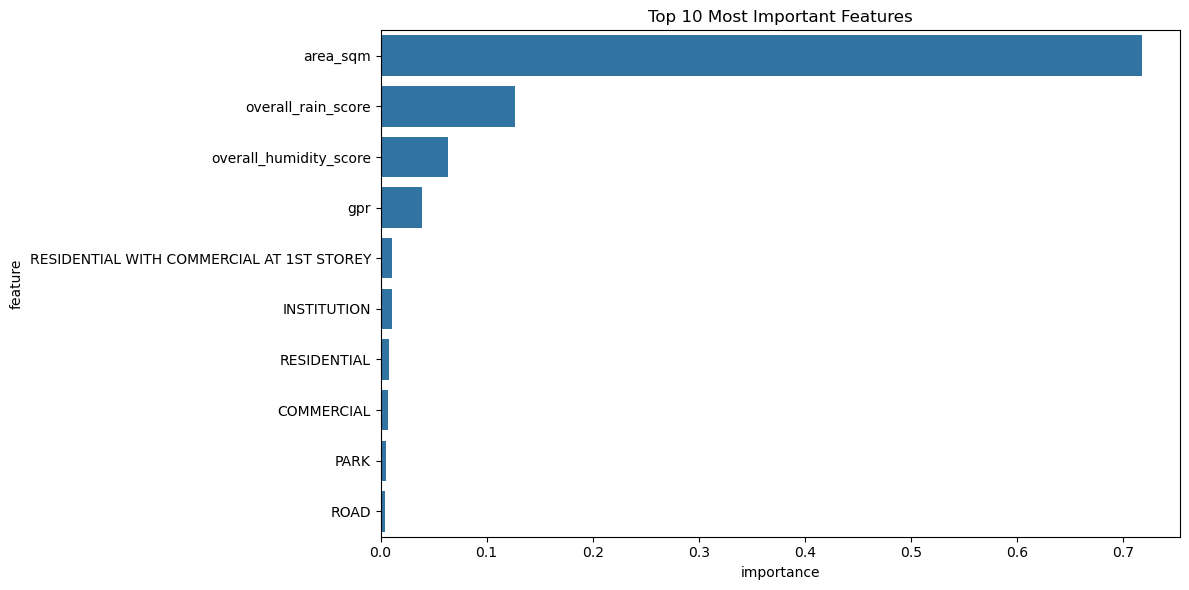

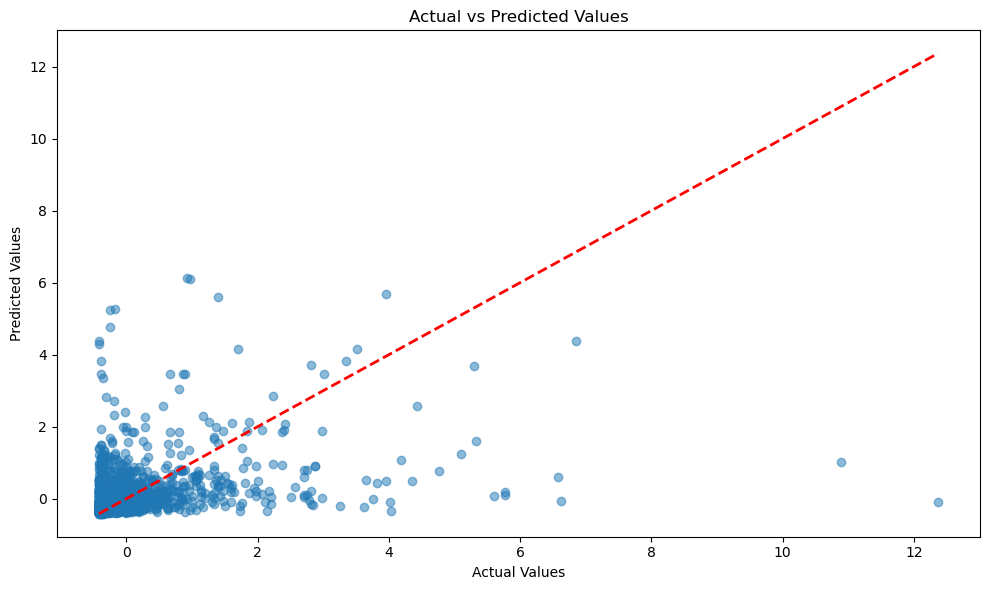

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preprocessing
def preprocess_data(df):
    # Create a copy to avoid modifying original data
    processed_df = df.copy()
    
    # Handle GPR values - convert 'EVA' to NaN and convert to float
    processed_df['gpr'] = pd.to_numeric(processed_df['gpr'].replace(['EVA', 'NA', 'LND'], np.nan), errors='coerce')
    
    # Fill missing values with median
    processed_df['gpr'] = processed_df['gpr'].fillna(processed_df['gpr'].median())
    processed_df['area_sqm'] = processed_df['area_sqm'].fillna(processed_df['area_sqm'].median())
    processed_df['overall_humidity_score'] = processed_df['overall_humidity_score'].fillna(processed_df['overall_humidity_score'].median())
    processed_df['overall_rain_score'] = processed_df['overall_rain_score'].fillna(processed_df['overall_rain_score'].median())
    
    # Normalize numerical columns
    scaler = StandardScaler()
    numerical_cols = ['total_cases', 'gpr', 'area_sqm', 'overall_humidity_score', 'overall_rain_score']
    processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])
    
    # Process lu_desc for multi-hot encoding
    # Split descriptions containing "/" and strip whitespace
    def split_land_use(desc):
        return [d.strip() for d in desc.split('/')]
    
    # Convert lu_desc to list of lists
    lu_desc_lists = processed_df['lu_desc'].apply(split_land_use)
    
    # Multi-hot encode lu_desc
    mlb = MultiLabelBinarizer()
    lu_desc_encoded = mlb.fit_transform(lu_desc_lists)
    
    # Create DataFrame with encoded values
    lu_desc_df = pd.DataFrame(lu_desc_encoded, columns=mlb.classes_)
    
    # Print unique land use types after splitting
    print("\nUnique land use types after splitting:")
    for col in sorted(lu_desc_df.columns):
        print(f"- {col}")
    
    # Print count of each land use type
    print("\nCount of each land use type:")
    land_use_counts = lu_desc_df.sum().sort_values(ascending=False)
    print(land_use_counts)
    
    # Combine numerical and encoded categorical features
    X = pd.concat([
        processed_df[numerical_cols].drop('total_cases', axis=1),
        lu_desc_df
    ], axis=1)
    y = processed_df['total_cases']
    
    return X, y, scaler, mlb

# 2. Model Training and Evaluation
def train_and_evaluate_model(X, y):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Save the model to a file
    with open('dengue_RFR_model.pkl', 'wb') as f:
        pickle.dump(model, f)
    print("Model saved to 'dengue_RFR_model.pkl'")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    return model, X_train, X_test, y_train, y_test, y_pred, mse, r2, feature_importance

# 3. Visualization
def plot_results(model, feature_importance, y_test, y_pred):
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.tight_layout()
    plt.show()

# Execute the pipeline
X, y, scaler, mlb = preprocess_data(final_df)
model, X_train, X_test, y_train, y_test, y_pred, mse, r2, feature_importance = train_and_evaluate_model(X, y)

# Print results
print(f"\nMean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Plot results
plot_results(model, feature_importance, y_test, y_pred)

# Brian 26 Apr: below code might not work, which is to use the model to predict

In [56]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

def predict_risk_for_postal_code(postal_code, data):
    """
    Predict dengue risk for a given postal code and visualize on a map.
    
    Parameters:
    -----------
    postal_code : int
        The postal code to analyze
    data : dict
        Dictionary containing all necessary dataframes
        
    Returns:
    --------
    folium.Map
        Interactive map showing risk prediction and relevant information
    """
    # Extract dataframes from the data dictionary
    dengue_cluster = data['dengue_cluster']
    land_use = data['land_use_data']
    postal_landuse_mapping = data['postal_landuse_mapping']
    landuse_station_mapping = data['landuse_station_mapping']
    humidity_scores = data['station_humidity_scores']
    rainfall_scores = data['station_rainfall_scores']
    
    # Print column names for debugging
    print("Postal-landuse mapping columns:", postal_landuse_mapping.columns.tolist())
    print("Humidity scores columns:", humidity_scores.columns.tolist())
    print("Rainfall scores columns:", rainfall_scores.columns.tolist())
    
    # Find the postal code in the mapping
    postal_matches = postal_landuse_mapping[postal_landuse_mapping['postal_code'] == postal_code]
    
    if len(postal_matches) == 0:
        print(f"Error: Postal code {postal_code} not found in the database.")
        return None
    
    # Get postal code details
    postal_match = postal_matches.iloc[0]
    
    # Check for different column names
    if 'lat' in postal_match.index:
        postal_lat = postal_match['lat']
        postal_lon = postal_match['lon']
    elif 'latitude' in postal_match.index:
        postal_lat = postal_match['latitude']
        postal_lon = postal_match['longitude']
    elif 'postal_lat' in postal_match.index:
        postal_lat = postal_match['postal_lat']
        postal_lon = postal_match['postal_lon']
    else:
        print("Error: Could not find latitude/longitude columns in postal_landuse_mapping.")
        print("Available columns:", postal_match.index.tolist())
        return None
    
    # Check for landuse name column
    if 'landuse_name' in postal_match.index:
        landuse_name = postal_match['landuse_name']
    elif 'land_use_name' in postal_match.index:
        landuse_name = postal_match['land_use_name']
    else:
        print("Error: Could not find landuse name column in postal_landuse_mapping.")
        print("Available columns:", postal_match.index.tolist())
        return None
    
    # Check for landuse type column
    if 'landuse_type' in postal_match.index:
        landuse_type = postal_match['landuse_type']
    elif 'land_use_type' in postal_match.index:
        landuse_type = postal_match['land_use_type']
    elif 'lu_desc' in postal_match.index:
        landuse_type = postal_match['lu_desc']
    else:
        print("Warning: Could not find landuse type column. Using 'Unknown'.")
        landuse_type = 'Unknown'
    
    # Find the land use area
    landuse_area_matches = land_use[land_use['name'] == landuse_name]
    
    if len(landuse_area_matches) == 0:
        print(f"Warning: Land use area '{landuse_name}' not found in land use data.")
        landuse_area = None
    else:
        landuse_area = landuse_area_matches.iloc[0]
    
    # Find the station for this land use area
    station_matches = landuse_station_mapping[landuse_station_mapping['landuse_name'] == landuse_name]
    
    # Initialize scores
    humidity_score = 0
    rainfall_score = 0
    
    if len(station_matches) > 0:
        station_id = station_matches.iloc[0]['station_id']
        
        # Check for humidity score
        humidity_matches = humidity_scores[humidity_scores['station_id'] == station_id]
        if len(humidity_matches) > 0:
            # Try different possible column names
            if 'score' in humidity_matches.columns:
                humidity_score = humidity_matches['score'].values[0]
            elif 'humidity_score' in humidity_matches.columns:
                humidity_score = humidity_matches['humidity_score'].values[0]
            elif 'value' in humidity_matches.columns:
                humidity_score = humidity_matches['value'].values[0]
            else:
                print("Warning: Could not find score column in humidity_scores.")
                print("Available columns:", humidity_matches.columns.tolist())
        
        # Check for rainfall score
        rainfall_matches = rainfall_scores[rainfall_scores['station_id'] == station_id]
        if len(rainfall_matches) > 0:
            # Try different possible column names
            if 'score' in rainfall_matches.columns:
                rainfall_score = rainfall_matches['score'].values[0]
            elif 'rainfall_score' in rainfall_matches.columns:
                rainfall_score = rainfall_matches['rainfall_score'].values[0]
            elif 'value' in rainfall_matches.columns:
                rainfall_score = rainfall_matches['value'].values[0]
            else:
                print("Warning: Could not find score column in rainfall_scores.")
                print("Available columns:", rainfall_matches.columns.tolist())
    
    # Find nearby dengue clusters
    nearby_clusters = dengue_cluster[
        (dengue_cluster['lat'].between(postal_lat - 0.01, postal_lat + 0.01)) &
        (dengue_cluster['lon'].between(postal_lon - 0.01, postal_lon + 0.01))
    ]
    
    # Prepare features for prediction
    features = {
        'landuse_type': landuse_type,
        'num_clusters': len(nearby_clusters),
        'total_cases': nearby_clusters['cases'].sum() if len(nearby_clusters) > 0 else 0,
        'avg_cases': nearby_clusters['cases'].mean() if len(nearby_clusters) > 0 else 0,
        'max_cases': nearby_clusters['cases'].max() if len(nearby_clusters) > 0 else 0,
        'humidity_score': humidity_score,
        'rainfall_score': rainfall_score
    }
    
    # Create feature DataFrame
    feature_df = pd.DataFrame([features])
    
    # Load model and scaler
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    
    # Transform features
    X = scaler.transform(feature_df)
    
    # Make prediction
    risk_level = model.predict(X)[0]
    risk_proba = model.predict_proba(X)[0]
    
    # Create a map centered on the postal code
    m = folium.Map(location=[postal_lat, postal_lon], zoom_start=15)
    
    # Add marker for postal code
    folium.Marker(
        [postal_lat, postal_lon],
        popup=f'Postal Code: {postal_code}<br>Land Use: {landuse_name}<br>Type: {landuse_type}',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
    
    # Add polygon for land use area if available
    if landuse_area is not None:
        try:
            coords = landuse_area['coordinates']
            if isinstance(coords, str):
                coords = eval(coords)
            
            # Determine color based on risk level
            if risk_level == 'High':
                color = 'red'
            elif risk_level == 'Medium':
                color = 'orange'
            else:
                color = 'green'
                
            folium.Polygon(
                locations=coords,
                popup=f'''
                Land Use Area: {landuse_name}<br>
                Type: {landuse_type}<br>
                Risk Level: {risk_level}<br>
                Risk Probabilities:<br>
                - Low: {risk_proba[0]:.2%}<br>
                - Medium: {risk_proba[1]:.2%}<br>
                - High: {risk_proba[2]:.2%}<br>
                <br>
                Features:<br>
                - Number of Clusters: {features['num_clusters']}<br>
                - Total Cases: {features['total_cases']}<br>
                - Avg Cases: {features['avg_cases']:.2f}<br>
                - Max Cases: {features['max_cases']}<br>
                - Humidity Score: {features['humidity_score']:.2f}<br>
                - Rainfall Score: {features['rainfall_score']:.2f}
                ''',
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.3
            ).add_to(m)
        except Exception as e:
            print(f"Could not add land use polygon: {str(e)}")
    
    # Add nearby dengue clusters
    for _, cluster in nearby_clusters.iterrows():
        folium.CircleMarker(
            location=[cluster['lat'], cluster['lon']],
            radius=10,
            popup=f'Dengue Cluster<br>Cases: {cluster["cases"]}',
            color='red',
            fill=True
        ).add_to(m)
    
    # Add a legend
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; right: 50px; width: 150px; height: 90px; 
                border:2px solid grey; z-index:9999; background-color:white;
                padding: 10px;
                font-size: 14px;">
        <p><strong>Risk Levels:</strong></p>
        <p><i class="fa fa-square fa-1x" style="color:green"></i> Low</p>
        <p><i class="fa fa-square fa-1x" style="color:orange"></i> Medium</p>
        <p><i class="fa fa-square fa-1x" style="color:red"></i> High</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    return m

# Example usage:
# postal_code = 544820
# risk_map = predict_risk_for_postal_code(postal_code, data)
# risk_map

In [58]:
# Get postal code from user
postal_code = int(input("Enter a postal code: "))

# Create the risk map
risk_map = predict_risk_for_postal_code(postal_code, data)

# Display the map
risk_map

Enter a postal code:  544820


Postal-landuse mapping columns: ['postal_code', 'postal_lat', 'postal_lon', 'landuse_name', 'landuse_type', 'landuse_lat', 'landuse_lon', 'distance_km', 'is_contained', 'rank']
Humidity scores columns: ['station_id', 'station_name', 'aggregated_value', 'reading_count', 'overall_humidity_score', 'latitude', 'longitude']
Rainfall scores columns: ['station_id', 'station_name', 'total_rainfall', 'reading_count', 'overall_rain_score', 'latitude', 'longitude']
Available columns: ['station_id', 'station_name', 'total_rainfall', 'reading_count', 'overall_rain_score', 'latitude', 'longitude']


KeyError: 'lat'